**AIVLE School 미니프로젝트**
### **통신 서비스 이용 고객의 <span style="color:darkgreen">이탈 여부</span> 예측 문제**
---

<br>

#### **<span style="color:red">[미션 안내]</span>**
* 고객 관련 데이터를 분석한 후 고객의 서비스 중단 또는 경쟁업체로의 이탈 여부를 예측하는 머신러닝, 딥러닝 모델을 만들고 결과를 예측하세요.

#### **<span style="color:red">[유의 사항]</span>**
* 각 문항의 답안코드는 반드시 '#여기에 답안코드를 작성하세요'로 표시된 cell에 작성해야 합니다.
* 제공된 cell을 추가/삭제하고 다른 cell에 답안코드를 작성 시 채점되지 않습니다.
* 반드시 문제에 제시된 가이드를 읽고 답안 작성하세요.
* 문제에 변수명이 제시된 경우 반드시 해당 변수명을 사용하세요.
* 문제와 데이터는 제3자에게 공유하거나 개인적인 용도로 사용하는 등 외부로 유출할 수 없으며 유출로 인한 책임은 응시자 본인에게 있습니다.

<br>

### 1. scikit-learn 패키지는 머신러닝 교육을 위한 최고의 파이썬 패키지입니다.
### scikit-learn를 별칭(alias) sk로 임포트하는 코드를 작성하고 실행하세요.

In [2]:
# 여기에 답안코드를 작성하세요.
import sklearn as sk

<br>

### 2. Pandas를 사용할 수 있도록 별칭(alias)을 pd로 해서 불러오세요.

In [3]:
# 여기에 답안코드를 작성하세요.
import pandas as pd

<br>

### 3. 모델링을 위해 분석 및 처리할 데이터 파일을 읽어오려고 합니다.
### Pandas함수로 데이터 파일을 읽어 데이터프레임 변수명 df에 할당하는 코드를 작성하세요.
* churn_data.csv 파일을 읽어 데이터 프레임 변수명 df에 할당하세요.

In [12]:
# 여기에 답안코드를 작성하세요.
df = pd.read_csv('churn_data.csv')

<br>

### 4. df에서 불필요한 customerID 컬럼을 삭제하고 df1에 저장하세요.

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,0.0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,NaN,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2,Yes,No,DSL,Yes,...,NaN,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45,No,No phone service,DSL,Yes,...,NaN,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2,Yes,No,Fiber optic,No,...,NaN,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
# 여기에 답안코드를 작성하세요.
df1 = df.drop(columns= ['customerID'])

<br>

### 5. df1의 TotalCharges 컬럼의 타입을 float로 변경하세요.
* TotalCharge의 컬럼 타입을 확인하는 코드를 작성하세요.
* ' ' 값을 0으로 변환하고 컬럼 타입을 float로 변경하세요.
* 전처리 후 데이터를 df2에 저장하세요.

In [23]:
# 여기에 답안코드를 작성하세요.
col = 'TotalCharges'
df1[col].dtype
df1[col] = df1[col].replace(' ', 0)
df1[col] = df1[col].astype(float)

In [24]:
df1[col].dtype

dtype('float64')

In [25]:
df2 = df1.copy()

<br>

### 6. df2에서 churn 컬럼의 데이터별 개수를 확인하는 코드를 작성하고 
### Yes, No를 각각 1, 0으로 변환한 후 df3에 저장하세요.

In [33]:
# 여기에 답안코드를 작성하세요.
df2['Churn'].value_counts()
df3 = df2.replace({'Churn':{'No':0, 'Yes':1}})

<br>

### 7. df3의 모든 컬럼에 대해 결측치를 확인하는 코드를 작성하고 결측치를 처리하세요.
* 결측치가 40% 이상인 컬럼은 컬럼을 삭제하세요.
* 결측치가 40% 미만인 컬럼은 결측치가 있는 row를 삭제하세요.
* 전처리한 데이터를 df4에 저장하세요.

In [35]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7034 non-null   object 
 1   SeniorCitizen     7042 non-null   float64
 2   Partner           7043 non-null   object 
 3   Dependents        7041 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7040 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  3580 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7042 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7042 non-null   object 


In [38]:
# 여기에 답안코드를 작성하세요.
df3.isna().sum()
df3.drop('DeviceProtection', axis=1, inplace = True)
df4 = df3.dropna(axis=0)
df4.shape

(7027, 19)

<br>

### 8. df4에서 SeniorCitizen 컬럼을 bar 차트로 확인해보고 불균형을 확인해보세요. 
### SeniorCitizen 컬럼은 불균형이 심하므로 삭제하세요.

C:\Users\User\AppData\Local\Temp\ipykernel_20992\273614176.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(col, axis=1, inplace=True)


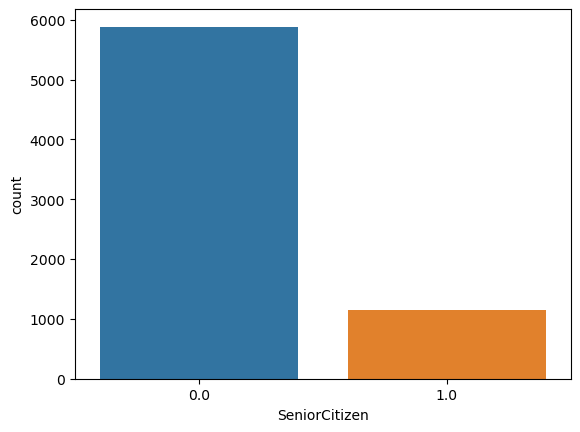

In [44]:
# 여기에 답안코드를 작성하세요.
import seaborn as sns
col = 'SeniorCitizen'

sns.countplot(x=col, data= df4)

df4.drop(col, axis=1, inplace=True)

### 9. df4에서 다음의 가이드에 따라 데이터를 시각화 해보세요.
* tenure (서비스 사용기간)에 대해 히스토그램으로 시각화 하세요.
* tenure를 x 값으로 churn을 hue 값으로 사용하여 kdeplot으로 시각화 하고 '서비스 사용기간이 길어질 수록 이탈이 적다'에 대해 'O'인지 'X'인지 출력하세요.
* MultipleLines에 대해 countplot을 그리고 churn을 hue 값으로 사용하여 countplot으로 시각화 하고 'MultipleLines 서비스를 사용하는 고객이 약간 더 높은 이탈율을 보인다'에 대해 'O'인지 'X'인지 출력하세요.
* 'tenure','MonthlyCharges','TotalCharges' 컬럼간의 상관관계를 확인하여 heatmap으로 시각화하고 가장 높은 상관계수 값을 출력하세요.

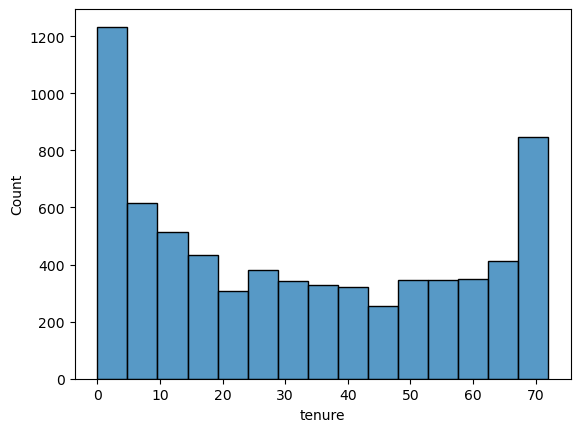

O


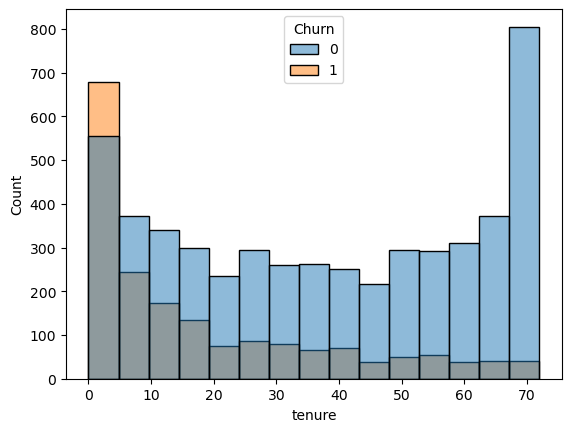

O


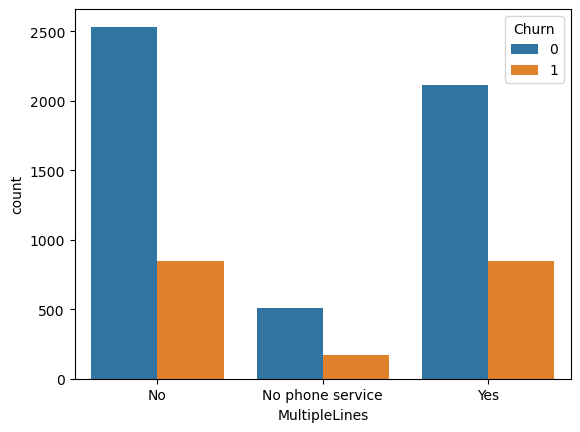

<Axes: >

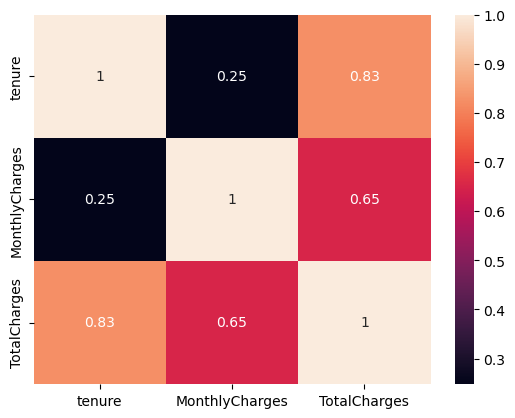

In [53]:
# 여기에 답안코드를 작성하세요.

import seaborn as sns
import matplotlib.pyplot as plt

col = 'tenure'
sns.histplot(x= col, data = df4)
plt.show()

sns.kdeplot(x= col, hue='Churn', data = df4)
print('O')
plt.show()

sns.countplot(x='MultipleLines', hue='Churn', data=df4)
print('O')
plt.show()

col_list = ['tenure','MonthlyCharges','TotalCharges']
sns.heatmap(df4[col_list].corr(), annot=True)
plt.show()
print('0.83')

<br>

### 10. df4에서 컬럼의 데이터 타입이 object인 컬럼들을 원-핫 인코딩하세요.
* 컬럼의 데이터 타입이 object인 컬럼들을 object_cols 변수에 저장하세요.
* object_cols 변수의 컬럼들을 원-핫 인코딩하세요.
* 전처리된 데이터를 df5에 저장하세요.

In [57]:
df4.shape

(7027, 18)

In [59]:
df4.head()  # 대충 보니 25~30개 정도 예상

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,Male,No,No,34,Yes,No,DSL,Yes,No,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,45,No,No phone service,DSL,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,Female,No,No,8,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1


In [70]:
object_cols = list(df4.select_dtypes(include='object'))
df5 = pd.get_dummies(columns = object_cols, data = df4, drop_first=True)

<br>

### 11. df5에 대해 Scikit-learn의 train_test_split 함수로 훈련, 검증 데이터를 분리하세요.
* 입력 : X, y (y에는 churn을 저장하고 X에는 churn을 제외한 나머지를 저장하세요)
* Train : Test 비율 = 8:2
* y Class 비율에 맞게 나누는 옵션을 추가하세요.
* random_state=42 로 설정하세요.
* 결과 : X_train, X_valid, y_train, y_valid에 저장하세요.

In [73]:
# 여기에 답안코드를 작성하세요.
from sklearn.model_selection import train_test_split

target = 'Churn'
X = df5.drop(target, axis=1)
y = df5.loc[:, target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5621, 27), (1406, 27), (5621,), (1406,))

### 12. MinMaxScaler 함수를 'scaler'로 정의하고 데이터를 정규화하세요.

In [75]:
# 여기에 답안코드를 작성하세요.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


<br>

### 13. 고객 이탈 여부를 예측하는 머신러닝 모델을 만들려고 합니다.
### 아래 가이드에 따라 모델링하고 학습을 진행하세요.
* LogisticRegression 모델 정의하고 학습시키세요. 
* KNN으로 모델을 정의하고 학습시키세요. (n_neighbors=5)
* Decision Tree로 모델을 정의하고 학습시키세요. (max_depth=10, random_state=42)
* RandomForest로 모델을 정의하고 학습시키세요. (n_estimators=3, random_state=42)
* XGBoost로 모델을 정의하고 학습시키세요. (n_estimators=3, random_state=42)  
* Light GBM으로 모델을 정의하고 학습시키세요. (n_estimators=3, random_state=42)  
* 각각 다른 셀에 답안코드를 작성하세요.

In [77]:
# 여기에 답안코드를 작성하세요.(LogisticRegression)
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
model_lr.score(X_test, y_test)

0.7930298719772404

In [84]:
# 여기에 답안코드를 작성하세요.(KNN)
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
# model_knn.score(X_test, y_test)

KNeighborsClassifier()

In [85]:
# 여기에 답안코드를 작성하세요.(Decision Tree)
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth=10, random_state=42)
model_dt.fit(X_train, y_train)
model_dt.score(X_test, y_test)

0.7368421052631579

In [86]:
# 여기에 답안코드를 작성하세요.(RandomForest)
from sklearn.ensemble import RandomForestClassifier

model_lf = RandomForestClassifier(n_estimators=3, random_state=42)
model_lf.fit(X_train, y_train)
model_lf.score(X_test, y_test)

0.7880512091038406

In [88]:
# 여기에 답안코드를 작성하세요.(XgBoost)
from xgboost import XGBClassifier

model_xgb = XGBClassifier(n_estimators=3, random_state=42)
model_xgb.fit(X_train, y_train)
model_xgb.score(X_test, y_test)

0.7965860597439545

In [122]:
# 여기에 답안코드를 작성하세요.(lightgbm)
from lightgbm import LGBMClassifier

model_lgbm = LGBMClassifier(n_estimators=3, random_state=42, verbose=-1)
model_lgbm.fit(X_train, y_train)
model_lgbm.score(X_test, y_test)

0.7347083926031295

### 14. 바로 위 모델의 성능을 평가하려고 합니다. 
### y값을 예측하여 confusion matrix를 구하고 heatmap 그래프로 시각화하세요. 
### 그리고 Scikit-learn의 classification_report를 활용하여 성능을 출력하세요.

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [123]:
# 여기에 답안코드를 작성하세요.
y_pred = model_lgbm.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1033    0]
 [ 373    0]]
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1033
           1       0.00      0.00      0.00       373

    accuracy                           0.73      1406
   macro avg       0.37      0.50      0.42      1406
weighted avg       0.54      0.73      0.62      1406



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##### **<span style="color:red">다음 문항을 풀기 전에</span> 아래 코드를 실행하세요.**

In [124]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

tf.random.set_seed(1)

### 15. 고객 이탈여부를 예측하는 딥러닝 모델을 만들려고 합니다.
### 아래 가이드에 따라 모델링하고 학습을 진행하세요.
* Tensoflow framework를 사용하여 딥러닝 모델을 만드세요.
* 히든레이어(hidden layer) 2개이상으로 모델을 구성하세요.
* dropout 비율 0.2로 Dropout 레이어 1개를 추가해 주세요.
* 하이퍼파라미터 epochs: 30, batch_size: 16으로 설정해주세요.
* 각 에포크마다 loss와 metrics 평가하기 위한 데이터로 X_valid, y_valid 사용하세요.
* 학습정보는 history 변수에 저장해주세요

In [126]:
X_train.shape

(5621, 27)

In [137]:
# 여기에 답안코드를 작성하세요.
model = Sequential([Dense(64, input_shape=X_train[0].shape, activation='relu'),
                    Dropout(0.2),
                  Dense(32, activation='relu'),
                  Dropout(0.2),
                Dense(16, activation='relu'),
                  Dropout(0.2),
                  Dense(1, activation='sigmoid')])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# val data
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, )

history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_valid, y_valid)).history

Epoch 1/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6683 - loss: 0.6033 - val_accuracy: 0.7304 - val_loss: 0.4771
Epoch 2/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7618 - loss: 0.4709 - val_accuracy: 0.7696 - val_loss: 0.4578
Epoch 3/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8007 - loss: 0.4536 - val_accuracy: 0.7935 - val_loss: 0.4535
Epoch 4/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7943 - loss: 0.4435 - val_accuracy: 0.8022 - val_loss: 0.4507
Epoch 5/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7927 - loss: 0.4338 - val_accuracy: 0.7891 - val_loss: 0.4487
Epoch 6/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8079 - loss: 0.4211 - val_accuracy: 0.7913 - val_loss: 0.4486
Epoch 7/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8108 - loss: 0.4146 - val_accuracy: 0.7891 - val_loss: 0.4545
Epoch 8/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7977 - loss: 0.4134 - val_accuracy: 0.

<br>

### 16. 위 딥러닝 모델의 성능을 평가하려고 합니다.
### Matplotlib 라이브러리 활용해서 학습 accuracy와 검증 accuracy를 그래프로 표시하세요.
* 1개의 그래프에 학습 accuracy와 검증 accuracy 2가지를 모두 표시하세요.
* 위 2가지 각각의 범례를 'acc', 'val_macc'로 표시하세요.
* 그래프의 타이틀은 'Accuracy'로 표시하세요.
* X축에는 'Epochs'라고 표시하고 Y축에는 'Acc'라고 표시하세요.

In [132]:
history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

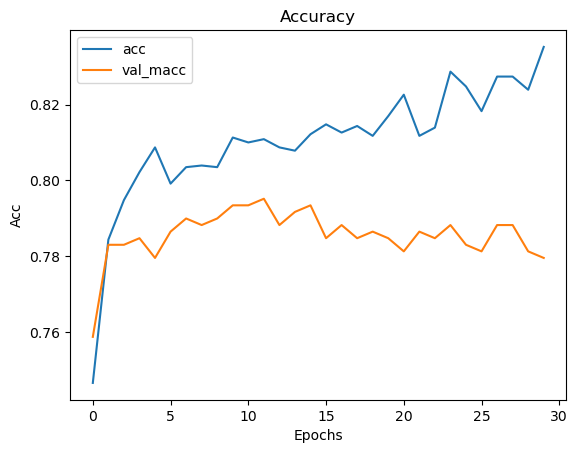

In [136]:
# 여기에 답안코드를 작성하세요.
plt.plot(history['accuracy'], label='acc')
plt.plot(history['val_accuracy'], label='val_macc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.title('Accuracy')
plt.show()